# Ερώτημα A: Tokens, Types, Zipf's Law
Σε αυτό το κομμάτι θα χρησιμοποιήσουμε ένα αρχείο με κείμενα από το Wall Street Journal με σκοπό να εξάγουμε ορισμένα δεδομένα σχετικά με το σύνολο των tokens, τα είδη τους και ορισμένα metrics σχετικά με το νόμο του Zipf.
Για το tokenization, αλλά και την εξερεύνηση διάφορων metrics έχω δημιουργήσει ορισμένα functions τα οποία είναι δυνατό να τροποποιηθούν ανάλογα με τη μέθοδο που θα χρησιμοποιήσουμε για το tokenization.
Σύμφωνα με την εκφώνηση, θα πρέπει να εξερευνηθούν τεχνικές tokenization από τις βιβλιοθήκες **nltk**, **spaCy** και **BertTokenizer**.

### Ορισμένα Βοηθητικά Functions
Τα ακόλουθα functions εκτελούν όλες τις λειτουργίες που θέλουμε για τις απαντήσεις των ερωτημάτων που ζητά η εκφώνηση. Ακολουθούν περαιτέρω σχόλια σε κάθε συνάρτηση ξεχωριστά.

#### Libraries
Οι βιβλιοθήκες που χρησιμοποιούνται στα βοηθητικά functions είναι οι:
1. Numpy, για ορισμένους αριθμητικούς υπολογισμούς
2. Pandas, για την καλύτερη εξερεύνηση των tokens και των συχνοτήτων τους
3. Matplotlib.pyplot, για απεικονίσεις και γραφήματα

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Υπολογισμός Συνολικού Αριθμού Tokens
Η πρώτη συνάρτηση μάς επιστρέφει το συνολικό αριθμό των tokens που προκύπτει μετά το tokenization. Είναι μία σχετικά απλή συνάρτηση που χρησιμοποιεί την εντολή len.

In [2]:
def total_tokens(list):
    return len(list)

#### Δημιουργία του Pandas DataFrame
Το ακόλουθο function παίρνει ως είσοδο τη λίστα των tokens που προκύπτει μετά το tokenization και δημιουργεί ένα DataFrame το οποίο περιέχει στην πρώτη στήλη τα tokens σε φθίνουσα σειρά συχνότητας ανάλογα με τον αριθμό των εμφανίσεών τους. Ο αριθμός των εμφανίσεων του κάθε token φαίνεται στη δεύτερη στήλη που έχει όνομα **counts**.
Η συνάρτηση επιστρέφει το DataFrame που δημιουργείται.
Είναι σημαντικό να σημειωθεί ότι το index κάθε token στο DataFrame ταυτίζεται με τη σειρά του ανάλογα με τον αριθμό εμφανίσεων. Δηλαδή, το 1ο σε αριθμό εμφανίσεων token έχει index 1, το 2ο 2 κλπ.

In [3]:
def create_df(list):
    word_frequencies = {}
    for word in list:
        if word in word_frequencies.keys():
            word_frequencies[word] = word_frequencies[word] + 1
        else:
            word_frequencies[word] = 1
    sorted_dict = {k: v for k, v in sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)}
    df = pd.DataFrame.from_dict(sorted_dict, orient='index', columns=['counts'])
    df = df.reset_index()
    df.index = np.arange(1, len(df) + 1)
    df.columns = ['word', 'counts']
    return df

#### Υπολογισμός Αριθμού Διαφορετικών Token Types
Τα διαφορετικά token types πρακτικά ταυτίζονται με τις γραμμές του DataFrame που δημιουργεί η προηγούμενη function, επομένως εδώ το μέγεθος του DataFrame είναι ο αριθμός που μας ενδιαφέρει.

In [4]:
def token_types(df):
    return len(df)

#### 20 Συχνότερα Tokens και Στήλες Probability, Position*Probability
Το ακόλουθο function δημιουργεί αρχικά τις δύο στήλες για τη συχνότητα του κάθε token (probability) και τη στήλη με το γινόμενο πιθανότητας επί θέση (position*probability). Για την πρώτη στήλη διαιρεί τις εμφανίσεις του κάθε token με το σύνολο των tokens, ενώ για τη δεύτερη απλά πολλαπλασιάζει τη στήλη probability με το index (**Σημείωση:** Η στήλη index ξεκινάει από 1 οπότε πράγματι περιέχει τη θέση του κάθε token).

In [5]:
def print_20_most_common(df):
    df['probability'] = df['counts']/df['counts'].sum()
    df['position*probability'] = df.index * df['probability']
    print(df.head(20))

#### Ποσοστό των Tokens που Εμφανίζονται 1, 2 ή 3 Φορές
Σε αυτό το function υπολογίζεται το ποσοστό των tokens που εμφανίζονται 1, 2 ή 3 φορές και ακολούθως τυπώνεται το ποσοστό που θα έπρεπε να εμφανίζονται τα tokens αυτά με βάση το νόμο του Zipf.

In [6]:
def real_vs_zipf(df):
    for i in range(1, 4):
        count = sum(df['counts'] == i)
        percentage = (count / len(df)) * 100

        print('Percentage of words with', i, 'count: {:.2f}%'.format(percentage))
        print('Percentage of words with', i, "count according to Zipf's law: {:.2f}%".format((1/(i*(i+1)))*100))

#### Υπολογισμός του Καλύτερου Α
Αυτό το function υπολογίζει την καλύτερη τιμή της σταθεράς Α. Σύμφωνα με την εκφώνηση ελέγχονται οι τιμές από 0.1 μέχρι 1.0. Ο στόχος είναι να βρούμε την τιμή της σταθεράς Α που ταιριάζει καλύτερα με τα κείμενα που μας δίνονται. Η συνάρτηση αυτή ελαχιστοποιεί το τετράγωνο του error για να προσεγγίσει την καλύτερη τιμή του Α.

In [7]:
def best_a(df):
    test_df = df
    best_fit = None
    for a in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        test_df['fit'] = (test_df['position*probability'] - a)**2
        current_fit = test_df['fit'].sum()
        if best_fit == None:
            best_fit = current_fit
            best_a = a
        elif best_fit > current_fit:
            best_fit = current_fit
            best_a = a
    return best_a

#### Απεικόνιση Πραγματικών Μετρήσεων έναντι Εκτιμήσεων από το Νόμο του Zipf
Εδώ, με βάση το καλύτερο Α που υπολογίσαμε από την προηγούμενη συνάρτηση δημιουργούμε ένα διάγραμμα που στον άξονα x έχει τη θέση του token σε φθίνουσα σειρά συχνότητας και στον άξονα y τη συχνότητά του.
Στο γράφημα υπάρχουν τόσο οι πραγματικές τιμές από τα κείμενα που εξετάσαμε όσο και οι εκτιμήσεις από το νόμο του Zipf με βάση το καλύτερο Α.

In [8]:
def plot_actual_vs_zipf(df):
    df['zipf_probability'] = 0.1 / df.index
    plt.figure(figsize=(10,6))
    plt.scatter(df.index, df['probability'], label='Real')
    plt.plot(df.index, df['zipf_probability'], label="Zipf's Estimation", linestyle='-', color='red')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

### Διάβασμα του Αρχείου που Πρέπει να Εξετάσουμε

In [9]:
textfile = open('../data/wsj_untokenized.txt', 'r').read()

## Nltk Tokenizer

Γίνονται import οι σχετικές βιβλιοθήκες με το nltk και κυρίως η συνάρτηση word_tokenize που θα χρησιμοποιηθεί για το tokenization.

In [10]:
import nltk
# nltk.download()
from nltk.tokenize import word_tokenize

Η συνάρτηση word_tokenize στο αρχικό κείμενο που μάς δίνεται επιστρέφει μία λίστα με tokens.

In [11]:
tokens = word_tokenize(textfile)

Καλείται η συνάρτηση για το πλήθος των συνολικών tokens.

In [12]:
print('The total number of tokens is:', total_tokens(tokens))

The total number of tokens is: 93530


Δημιουργείται το DataFrame του Pandas με την κλήση της σχετικής συνάρτησης.

In [13]:
nltk_df = create_df(tokens)

Καλείται η συνάρτηση για τον αριθμό των διαφορετικών tokens.

In [14]:
print('The number of different tokens is:', token_types(nltk_df))

The number of different tokens is: 12000


Προσθέτονται οι στήλες probability και position*probability στο DataFrame και τυπώνονται οι 20 πρώτες λέξεις σε συχνότητα.

In [15]:
print_20_most_common(nltk_df)

    word  counts  probability  position*probability
1      ,    4823     0.051566              0.051566
2    the    4041     0.043205              0.086411
3      .    3819     0.040832              0.122495
4     of    2312     0.024719              0.098877
5     to    2157     0.023062              0.115311
6      a    1857     0.019855              0.119128
7     in    1563     0.016711              0.116979
8    and    1489     0.015920              0.127360
9     ''     959     0.010253              0.092281
10    's     863     0.009227              0.092270
11   for     815     0.008714              0.095852
12  that     807     0.008628              0.103539
13   The     714     0.007634              0.099241
14     $     708     0.007570              0.105977
15    is     671     0.007174              0.107613
16  said     627     0.006704              0.107260
17    on     489     0.005228              0.088881
18    it     475     0.005079              0.091415
19     %    

Αποτέλεσμα του word_tokenize της nltk σε μία τυχαία πρόταση.

In [16]:
sentence = 'The National Association of Manufacturers settled on the Hoosier capital of Indianapolis for its fall board meeting.'
tokens_sentence = word_tokenize(sentence)
print(tokens_sentence)

['The', 'National', 'Association', 'of', 'Manufacturers', 'settled', 'on', 'the', 'Hoosier', 'capital', 'of', 'Indianapolis', 'for', 'its', 'fall', 'board', 'meeting', '.']


Τα αποτελέσματα τις σύγκρισης ανάμεσα στο ποσοστό των λέξεων που εμφανίζονται 1, 2 ή 3 φορές και το ποσοστό που θα περιμέναμε με βάση το νόμο του Zipf.

In [17]:
real_vs_zipf(nltk_df)

Percentage of words with 1 count: 52.12%
Percentage of words with 1 count according to Zipf's law: 50.00%
Percentage of words with 2 count: 15.25%
Percentage of words with 2 count according to Zipf's law: 16.67%
Percentage of words with 3 count: 7.52%
Percentage of words with 3 count according to Zipf's law: 8.33%


Καλείται η συνάρτηση για τον υπολογισμό του κατάλληλου Α.

In [18]:
best_a(nltk_df)

0.1

Και βάσει του παραπάνω αποτελέσματος δημιουργούμε και το plot.

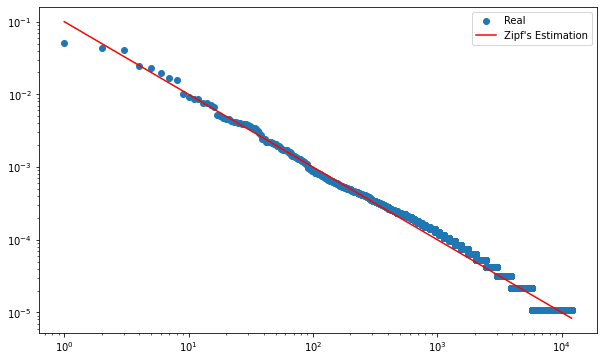

In [19]:
plot_actual_vs_zipf(nltk_df)

## spaCy

Αρχικά κάνουμε import τη βιβλιοθήκη που θα χρειαστούμε και μετατρέπουμε τα δεδομένα σε μορφή λίστας με tokens για να μπορούν να χρησιμοποιηθούν από τις βοηθητικές συναρτήσεις που έχουμε.

In [20]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(textfile)

tokenized_text_spacy = []

for token in doc:
    tokenized_text_spacy.append(token.text)

Καλείται η συνάρτηση για το πλήθος των συνολικών tokens.

In [21]:
print('The total number of tokens is:', total_tokens(tokenized_text_spacy))

The total number of tokens is: 95894


Δημιουργείται το DataFrame του Pandas με την κλήση της σχετικής συνάρτησης.

In [22]:
spacy_df = create_df(tokenized_text_spacy)

Καλείται η συνάρτηση για τον αριθμό των διαφορετικών tokens.

In [23]:
print('The number of different tokens is:', token_types(spacy_df))

The number of different tokens is: 11477


Προσθέτονται οι στήλες probability και position*probability στο DataFrame και τυπώνονται οι 20 πρώτες λέξεις σε συχνότητα.

In [24]:
print_20_most_common(spacy_df)

    word  counts  probability  position*probability
1      ,    4823     0.050295              0.050295
2    the    4047     0.042203              0.084406
3      .    3761     0.039220              0.117661
4     of    2313     0.024120              0.096482
5     to    2162     0.022546              0.112729
6      a    1868     0.019480              0.116879
7     in    1576     0.016435              0.115044
8    and    1496     0.015601              0.124804
9     ''    1372     0.014307              0.128767
10     -    1231     0.012837              0.128371
11    's     863     0.009000              0.098995
12   for     815     0.008499              0.101988
13  that     807     0.008416              0.109402
14   The     714     0.007446              0.104240
15     $     702     0.007321              0.109809
16    is     671     0.006997              0.111957
17  said     627     0.006538              0.111154
18    on     491     0.005120              0.092164
19    it    

Αποτελέσματα του tokenization της spacy στην ίδια πρόταση που εξετάστηκε και στην με το tokenization της nltk παραπάνω.

In [25]:
sentence = 'The National Association of Manufacturers settled on the Hoosier capital of Indianapolis for its fall board meeting.'
tokens_sentence = nlp(sentence)

tokens = []

for token in tokens_sentence:
    tokens.append(token.text)
print(tokens)

['The', 'National', 'Association', 'of', 'Manufacturers', 'settled', 'on', 'the', 'Hoosier', 'capital', 'of', 'Indianapolis', 'for', 'its', 'fall', 'board', 'meeting', '.']


Τα αποτελέσματα τις σύγκρισης ανάμεσα στο ποσοστό των λέξεων που εμφανίζονται 1, 2 ή 3 φορές και το ποσοστό που θα περιμέναμε με βάση το νόμο του Zipf.

In [26]:
real_vs_zipf(spacy_df)

Percentage of words with 1 count: 50.07%
Percentage of words with 1 count according to Zipf's law: 50.00%
Percentage of words with 2 count: 15.60%
Percentage of words with 2 count according to Zipf's law: 16.67%
Percentage of words with 3 count: 7.70%
Percentage of words with 3 count according to Zipf's law: 8.33%


Καλείται η συνάρτηση για τον υπολογισμό του κατάλληλου Α.

In [27]:
best_a(spacy_df)

0.1

Και βάσει του παραπάνω αποτελέσματος δημιουργούμε και το plot.

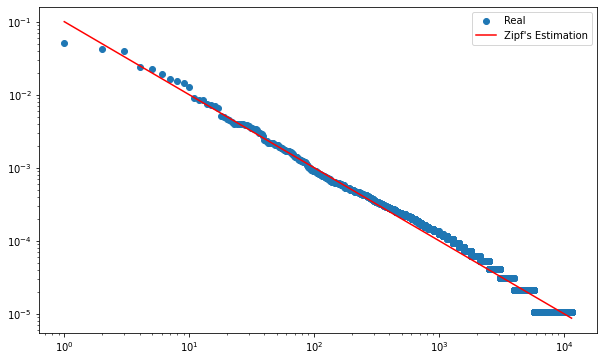

In [28]:
plot_actual_vs_zipf(spacy_df)

## Bert Tokenizer

Αρχικά κάνουμε import τη βιβλιοθήκη που θα χρειαστούμε και μετατρέπουμε τα δεδομένα σε μορφή λίστας με tokens για να μπορούν να χρησιμοποιηθούν από τις βοηθητικές συναρτήσεις που έχουμε.

In [29]:
from transformers import BertTokenizer

tz = BertTokenizer.from_pretrained("bert-base-cased")
bert_tokenization = tz.tokenize(textfile)

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Καλείται η συνάρτηση για το πλήθος των συνολικών tokens.

In [30]:
print('The total number of tokens is:', total_tokens(bert_tokenization))

The total number of tokens is: 112325


Δημιουργείται το DataFrame που θα χρησιμοποιηθεί για την ανάλυση των δεδομένων.

In [31]:
bert_df = create_df(bert_tokenization)

Καλείται η συνάρτηση για τον υπολογισμό των διαφορετικών tokens.

In [32]:
print('The number of different tokens is:', token_types(bert_df))

The number of different tokens is: 10266


Προσθέτονται οι στήλες probability και position*probability στο DataFrame και τυπώνονται οι 20 πρώτες λέξεις σε συχνότητα.

In [33]:
print_20_most_common(bert_df)


    word  counts  probability  position*probability
1      .    6363     0.056648              0.056648
2      ,    5026     0.044745              0.089490
3      '    4117     0.036653              0.109958
4    the    4049     0.036047              0.144189
5     of    2314     0.020601              0.103005
6     to    2167     0.019292              0.115753
7      a    1927     0.017156              0.120089
8      -    1733     0.015428              0.123428
9     in    1600     0.014244              0.128199
10   and    1498     0.013336              0.133363
11     s     932     0.008297              0.091271
12   for     815     0.007256              0.087069
13  that     807     0.007185              0.093399
14   The     715     0.006365              0.089116
15     $     708     0.006303              0.094547
16   ##s     686     0.006107              0.097716
17    is     628     0.005591              0.095046
18  said     627     0.005582              0.100476
19    on    

Αποτελέσματα του tokenization από το BertTokenizer στην ίδια πρόταση που εξετάστηκε και στην με το tokenization της nltk παραπάνω.

In [34]:
sentence = 'The National Association of Manufacturers settled on the Hoosier capital of Indianapolis for its fall board meeting.'
tokens_sentence = tz.tokenize(sentence)
print(tokens_sentence)

['The', 'National', 'Association', 'of', 'Man', '##uf', '##act', '##urers', 'settled', 'on', 'the', 'Ho', '##os', '##ier', 'capital', 'of', 'Indianapolis', 'for', 'its', 'fall', 'board', 'meeting', '.']


Τα αποτελέσματα τις σύγκρισης ανάμεσα στο ποσοστό των λέξεων που εμφανίζονται 1, 2 ή 3 φορές και το ποσοστό που θα περιμέναμε με βάση το νόμο του Zipf.

In [35]:
real_vs_zipf(bert_df)

Percentage of words with 1 count: 37.51%
Percentage of words with 1 count according to Zipf's law: 50.00%
Percentage of words with 2 count: 16.79%
Percentage of words with 2 count according to Zipf's law: 16.67%
Percentage of words with 3 count: 9.24%
Percentage of words with 3 count according to Zipf's law: 8.33%


Υπολογισμός του κατάλληλου Α χρησιμοποιώντας τη σχετική συνάρτηση.

In [36]:
best_a(bert_df)

0.1

Και τέλος, απεικόνιση των αποτελεσμάτων σε ένα plot.

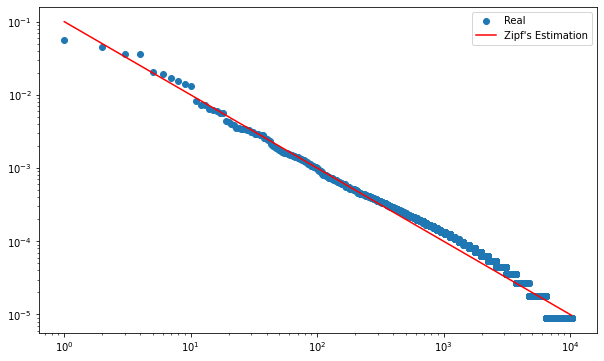

In [37]:
plot_actual_vs_zipf(bert_df)